In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install keras
from numpy.linalg import inv
from tensorflow.keras.layers import Dense
from collections import defaultdict
from keras.layers import Dense, Activation
from keras.models import Sequential, Model


In [42]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train_data=train_data.replace(['female','male'],[0,1])
train_data=train_data.replace(['S','C','Q'],[0,1,2])
tarin_data=train_data.fillna(0,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


In [44]:
Y_train=train_data[['Survived']]
X_train=train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=np.array(Y_train)
X_train=np.array(X_train)

In [45]:
test_data = pd.read_csv('test.csv')
test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)
X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.read_csv('gender_submission.csv')
Y_test = test[['Survived']]

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [121]:
model=tf.keras.models.Sequential([
                               tf.keras.layers.Dense(7,activation='relu'),
                               tf.keras.layers.Dense(7,activation='sigmoid'),
                               tf.keras.layers.Dense(32,activation='relu'),
                               tf.keras.layers.Dense(128,activation='relu'),
                               tf.keras.layers.Dense(128,activation='sigmoid'),
                               tf.keras.layers.Dense(2,activation='sigmoid')


])

In [122]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [123]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
output=model.fit(X_train,Y_train,epochs=200)

(891, 7) (891,)
(418, 7) (418,)
Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.6721 - accuracy: 0.5982
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6117
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6364
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6678
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.6801
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6768
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6734
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6723
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6756
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5

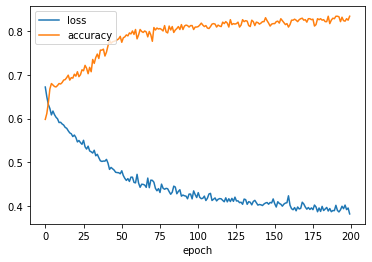

In [124]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [125]:
model.evaluate(X_test,Y_test)
pred=[[1,0,34,1,0,54.3900,2]]
y_pred=np.argmax(model.predict(pred))
print(y_pred)

14/14 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.9115
1


In [126]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [127]:
class KNN:
  
  def __init__(self,k):
    self.k=k

  def fit(self,X_train,Y_train):
    self.X_train=X_train
    self.Y_train=Y_train

    self.num_of_class=len(np.unique(Y_train))
    #print(self.num_of_class)

  def nearNeighbors(self,X_test):
    distance=np.sqrt(np.sum((X_test-self.X_train)**2,axis=1))
    near_neighbors=np.argsort(distance)[0:self.k]
    return near_neighbors


  def predict(self,X_test):
    near_neighbors=self.nearNeighbors(X_test)
    #print(near_neighbors)
    y_pred=np.argmax(np.bincount(self.Y_train[near_neighbors])) 
    return y_pred

  def evaluate(self,X_test,Y_test):
    num_of_correct_pred=0
    self.X_test=X_test
    self.Y_test=Y_test
    y=[]
    for i in range(X_test.shape[0]):
      #print(X_test.shape[0],X_test[i])
      y.append(self.predict(X_test[i,:]))
    for i in range(len(y)):
      if(Y_test[i]==y[i]):
        num_of_correct_pred +=1
        #print(num_of_correct_pred)
    return (num_of_correct_pred /len(Y_test))*100

In [128]:
print(Y_test.shape)
print(Y_train.shape)
Y_train=Y_train.reshape(-1)
Y_test=Y_test.reshape(-1)
print(Y_train.shape,Y_test.shape)

knn=KNN(5)
knn.fit(X_train,Y_train)
accuracy=knn.evaluate(X_test,Y_test)
print("accuracy :",accuracy)

(418,)
(891,)
(891,) (418,)
accuracy : 65.55023923444976


In [129]:
class Adaline:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):
    self.w=np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,Y_train)) 
    
  def predict(self,X_test):
    y_pred=[]

    Y_pred=np.matmul(X_test,self.w)  
    for i in range(len(Y_pred)):
      if((Y_pred[i]-Y_test[i])**2)<= 0.5:
        y_pred.append(0)
      elif((Y_pred[i]-Y_test[i])**2)> 0.5:
        y_pred.append(1)
    return y_pred    

  def evaluate(self,y_pred,Y_test):
    num_of_correct_pred=0
    y=[]

    for i in range(len(Y_test)):
      if(Y_test[i]==y_pred[i]):
        num_of_correct_pred+=1
    accuracy=(num_of_correct_pred/len(Y_test))*100
    return accuracy

In [130]:
adaline=Adaline()
adaline.fit(X_train,Y_train)
y_pred=adaline.predict(X_test)
accuracy=adaline.evaluate(y_pred,Y_test)
print("accuracy =",accuracy)

accuracy = 62.67942583732058


In [131]:
class Perceptron:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):

    errors=[]
    iteration=[]
    lr=0.001
    
    N=X_train.shape[0]
    self.w=np.random.rand(7,1)
    self.b=np.random.rand(1,1)

    for j in range(N):
        
      y_pred=np.matmul(X_train[j],self.w)+self.b
      e=Y_train[j]-y_pred
      
      self.w+=(lr*(X_train[j].T*e).T)
      self.b+=lr*e
      
       
      Y_pred=np.matmul(X_train,self.w)+self.b
     

  def predict(self,X_test):
    Y_test_pred=np.matmul(X_train,self.w)+self.b
    Y_test_pred[Y_test_pred>0.5]=1
    Y_test_pred[Y_test_pred<=0.5]=0
    #print(Y_test_pred)
    return Y_test_pred

 
  def evaluate(self,X_train,X_test):
    Y_test_pred=np.matmul(X_test,self.w)+self.b
    Y_test_pred[Y_test_pred>0.5]=1
    Y_test_pred[Y_test_pred<=0.5]=0

    num_of_correct_pred=0

    for i in range(len(Y_test)):
      if(Y_test_pred[i]==Y_test[i]):
        num_of_correct_pred+=1
    accuracy=num_of_correct_pred/len(Y_test)*100
    return accuracy

In [132]:
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_test_pred=perceptron.predict(X_test)

accuracy=perceptron.evaluate(X_train,X_test)
print('accuracy ',accuracy)

accuracy  61.961722488038276
